In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import joblib

In [5]:

df = pd.read_excel('ai4i2020.xlsx')
display(df.head())
print(df.shape)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


(10000, 14)


##### Variable :

- Product Type : Tipe/kualitas mesin (L/M/H)
- Air temperature (K) : Suhu udara di sekitar mesin
- Process temperature (K) : Suhu aktual selama proses manufaktur
- Rotational speed (rpm) : Kecepatan putaran spindel pada komponen mesin
- Torque (Nm) : Torsi mesin
- Tool wear (min) :

##### Tipe-tipe Failure :

- TWF :	Tool ware failure
- HDF : Heat dissipation failure
- PWF : Power failure
- OSF : Overstrain failure
- RNF : Random failure

### Problem Statement

### 1. Question
1. Variabel/Parameter proses apa yang paling berkontribusi terhadap kegagalan mesin?
2. Tipe kualitas produk (L, M, H) apa yang paling sering gagal mesin?

### 2. Data Cleansing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

[array([    1,     2,     3, ...,  9998,  9999, 10000], dtype=int64),
 array([298.1, 298.2, 298.1, ..., 299. , 299. , 299. ]),
 array([308.6, 308.7, 308.5, ..., 308.6, 308.7, 308.7]),
 array([1551, 1408, 1498, ..., 1645, 1408, 1500], dtype=int64),
 array([42.8, 46.3, 49.4, ..., 33.4, 48.5, 40.2]),
 array([ 0,  3,  5, ..., 22, 25, 30], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

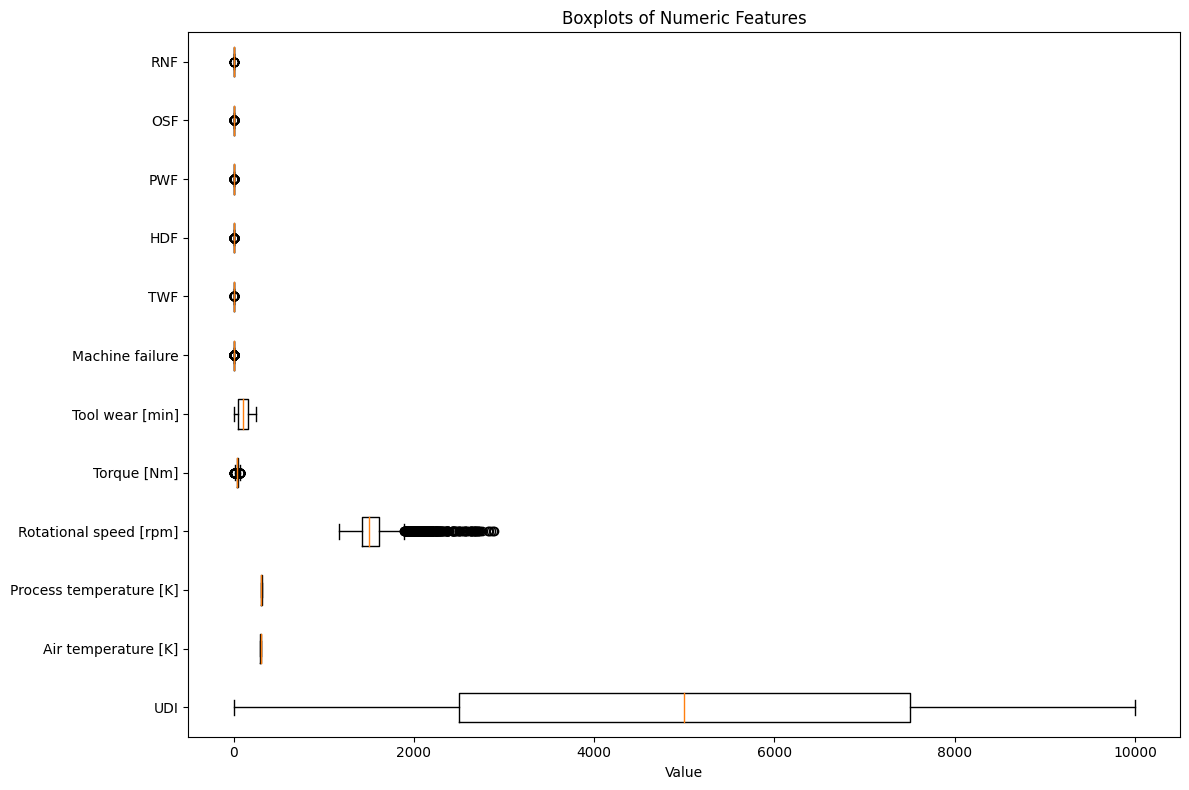

In [8]:
# Outlier Detection
numeric_cols = df.select_dtypes(include = "number").columns
# Extract their values as a 2D array (shape: n_columns x n_samples)
data = [df[col].dropna().values for col in numeric_cols]
display(data)
plt.figure(figsize=(12, 8))
plt.boxplot(data, vert=False, labels=numeric_cols)
plt.title("Boxplots of Numeric Features")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

In [9]:
# # Column berikut sangat skewed, maka diterapkan transformasi
# cols_to_log = ['Rotational speed [rpm]']
# # Applying log transformation directly to the original columns
# for col in cols_to_log:
#     df[col] = np.log1p(df[col])

In [10]:
# Drop duplicate
df.drop_duplicates(subset=None, inplace=True)

In [11]:
# Rename kolom old1 → new1, old2 → new2
df_renamed = df.rename(
    columns={
        'Air temperature [K]' : 'Air Temperature',
        'Process temperature [K]' : 'Process Temperature',
        'Rotational speed [rpm]' : 'Rotational Speed',
        'Torque [Nm]'	: 'Torque',
        'Tool wear [min]' : 'Tool Wear'
    },
    inplace=False 
)
display(df_renamed)

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


#### Inconsintencies Label

In [12]:
# RNF = 1 -> Machine failure = 0, harusnya 1 juga
    
# Jika ada failure type tapi Machine failure == 0, ubah jadi 1
df_renamed['Machine failure'] = ((df_renamed[['TWF','HDF','PWF','OSF','RNF']].sum(axis=1)) > 0).astype(int)
df_renamed.loc[df_renamed['RNF'] > 0]

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,1,0,0,0,0,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,1,0,0,0,0,1
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,1,0,0,0,0,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,1,0,0,0,0,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,1,0,0,0,0,1
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,1,0,0,0,0,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,1,0,0,0,0,1
3611,3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,1,0,0,0,0,1
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,1,0,0,0,0,1


### Exploratory Data Analysis

In [13]:
df_cleaned = df_renamed.copy()

In [14]:
df_cleaned.describe()

,UDI,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.034800,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.183282,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


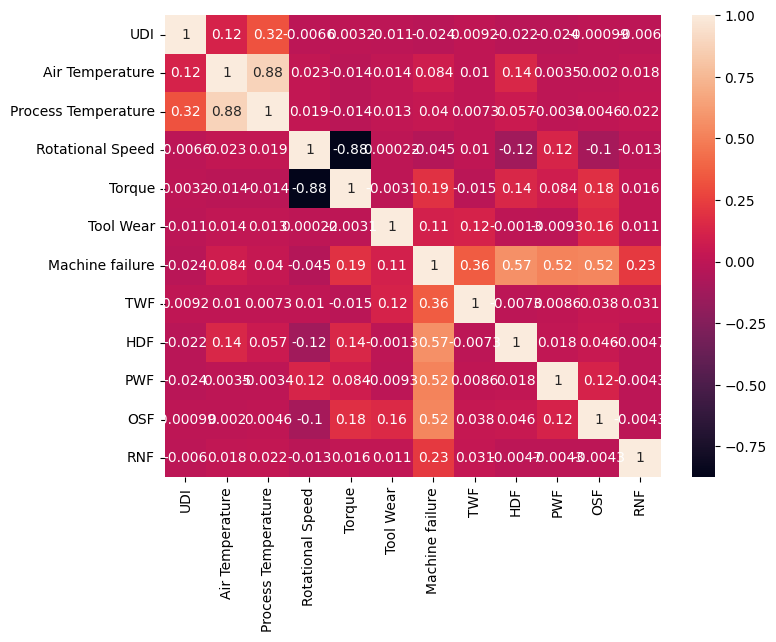

In [15]:
import seaborn as sns
df_numeric = df_cleaned.select_dtypes(include='number')
corr_matrix = df_numeric.corr('pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Beberapa fitur yang berkolerasi tinggi secara natural :
1. Air temperature & Process temperature (Positively Correlated)
2. Rotational speed & Torque (Negatively Correlated)

Machine failure
0    9652
1     348
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

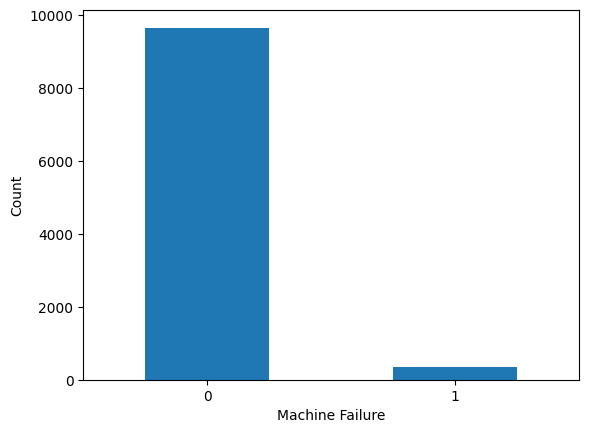

In [16]:
display(df_cleaned['Machine failure'].value_counts())
df_cleaned['Machine failure'].value_counts().plot(kind='bar')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.xticks(rotation = 0)

TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64

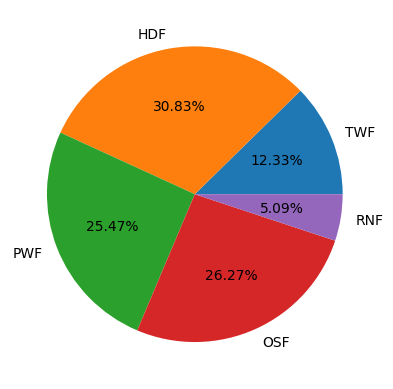

In [17]:
display(df_cleaned[['TWF', 'HDF', 'PWF', 'OSF',	'RNF']].sum())
plt.pie(df_cleaned[['TWF', 'HDF', 'PWF', 'OSF',	'RNF']].sum(), labels=['TWF', 'HDF', 'PWF', 'OSF',	'RNF'], autopct='%1.2f%%')
plt.show()

Machine Failure didominasi oleh Heat Dissipation Failure (HDF)

### 1. Modelling Anomaly Detection

In [18]:
df_preprocessed = df_cleaned.copy()

In [19]:
from sklearn.model_selection import train_test_split
X = df_preprocessed.drop(columns=['UDI', 'Product ID','Type', 'Machine failure','TWF', 'HDF', 'PWF', 'OSF','RNF'])
y = df_preprocessed['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
#Numeric Feature Scaling
from sklearn.preprocessing import StandardScaler
num_col = X_train.select_dtypes(include='number').columns.tolist()
model1_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    model1_scaler.fit_transform(X_train[num_col]),
    columns=num_col,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    model1_scaler.transform(X_test[num_col]),
    columns=num_col,
    index=X_test.index
)

#### Logistic Regression

In [21]:
#RFECV Feature Selection 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define logistic regression estimator
logreg = LogisticRegression()

# RFECV dengan 5-fold stratified CV dan scoring akurasi
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
rfecv = RFECV(estimator=logreg, step=1, cv=cv, scoring='roc_auc', min_features_to_select=1, n_jobs=-1)
rfecv.fit(X_train_scaled, y_train)

# Hasil seleksi:
selected_mask = rfecv.support_              # array boolean
ranking = rfecv.ranking_                    # nilai ranking
selected_features = X_train_scaled.columns[selected_mask]

print(f"Optimal number of features: {rfecv.n_features_}")
print("Selected features:")
print(selected_features.tolist())

Optimal number of features: 5
Selected features:
['Air Temperature', 'Process Temperature', 'Rotational Speed', 'Torque', 'Tool Wear']


In [22]:
# Ambil fitur hasil RFECV
X_train_rfe = X_train_scaled.loc[:, selected_features]
X_test_rfe  = X_test_scaled.loc[:, selected_features]

In [23]:
#VIF CHECK
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Air Temperature,4.30
1,Process Temperature,4.30
2,Rotational Speed,4.26
3,Torque,4.25
4,Tool Wear,1.00


Nilai VIF untuk semua fitur sudah < 5

In [24]:
# P-VALUE CHECK
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

X_train1 = sm.add_constant(X_train_rfe)
reg_logit = sm.Logit(y_train,X_train1)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.101058
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Machine failure   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7994
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                  0.3302
Time:                        23:52:38   Log-Likelihood:                -808.46
converged:                       True   LL-Null:                       -1207.1
Covariance Type:            nonrobust   LLR p-value:                4.608e-170
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.7057      0.128    -36.730      0.000      -4.957      -4.455
Air Temperature         1.4334      0.157      9.137      0.000       1.126       1.741
Process Temperature    -0.9976      0.156     -6.392      0.000      -1.303      -0.692
Rotational Speed        1.9739      0.102     19.441      0.000       1.775       2.173
Torque                  2.6577      0.121     21.984      0.000       2.421       2.895
Tool Wear               0.7860      0.077     10.158      0.000       0.634       0.938
=======================================================================================
"""

In [25]:
params = np.exp(results_logit.params)
conf = np.exp(results_logit.conf_int())
conf['OR'] = params
pvalue=round(results_logit.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                     CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                    0.007035       0.011625    0.009043     0.0
Air Temperature          3.083103       5.702542    4.193033     0.0
Process Temperature      0.271590       0.500715    0.368767     0.0
Rotational Speed         5.899727       8.783740    7.198726     0.0
Torque                  11.254203      18.076898   14.263277     0.0
Tool Wear                1.885701       2.553865    2.194499     0.0


p-value seluruh fitur sudah < (0.05) 5%

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1930
           1       0.14      0.89      0.24        70

    accuracy                           0.80      2000
   macro avg       0.57      0.84      0.56      2000
weighted avg       0.96      0.80      0.86      2000



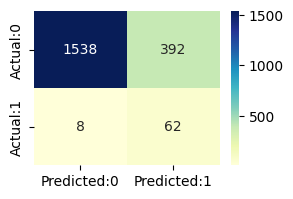

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_rfe,y_train)
y_pred=logreg.predict(X_test_rfe)

print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [27]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix

y_pred_prob_yes = logreg.predict_proba(X_test_rfe)

for i in range(0, 11):
    thresh = i / 10
    y_pred2 = binarize(y_pred_prob_yes, threshold=thresh)[:, 1].astype(int)
    cm2 = confusion_matrix(y_test, y_pred2)
    
    tn, fp, fn, tp = cm2.ravel()
    accuracy = tn + tp
    sensitivity = tp / float(tp + fn)      # recall of positive class
    specificity = tn / float(tn + fp)      # true negative rate
    
    print(f"With threshold={thresh:.1f}")
    print("Confusion Matrix:\n", cm2)
    print(f"  Correct predictions: {accuracy}  |  Type II errors (FN): {fn}")
    print(f"  Sensitivity: {sensitivity:.3f}  Specificity: {specificity:.3f}\n\n")

With threshold=0.0
Confusion Matrix:
 [[   0 1930]
 [   0   70]]
  Correct predictions: 70  |  Type II errors (FN): 0
  Sensitivity: 1.000  Specificity: 0.000


With threshold=0.1
Confusion Matrix:
 [[ 607 1323]
 [   0   70]]
  Correct predictions: 677  |  Type II errors (FN): 0
  Sensitivity: 1.000  Specificity: 0.315


With threshold=0.2
Confusion Matrix:
 [[979 951]
 [  1  69]]
  Correct predictions: 1048  |  Type II errors (FN): 1
  Sensitivity: 0.986  Specificity: 0.507


With threshold=0.3
Confusion Matrix:
 [[1219  711]
 [   2   68]]
  Correct predictions: 1287  |  Type II errors (FN): 2
  Sensitivity: 0.971  Specificity: 0.632


With threshold=0.4
Confusion Matrix:
 [[1403  527]
 [   4   66]]
  Correct predictions: 1469  |  Type II errors (FN): 4
  Sensitivity: 0.943  Specificity: 0.727


With threshold=0.5
Confusion Matrix:
 [[1538  392]
 [   8   62]]
  Correct predictions: 1600  |  Type II errors (FN): 8
  Sensitivity: 0.886  Specificity: 0.797


With threshold=0.6
Confusion 

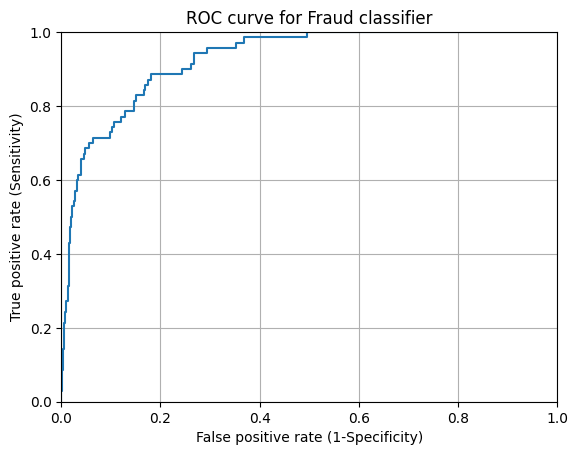

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9268171724648409

In [30]:
feature_names = X_train_rfe.columns
# Koefisien untuk tiap fitur (array shape [n_features])
coefs = logreg.coef_[0]
# Satukan dalam DataFrame untuk sort & interpretasi
df_coefs = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs,
    'odds_ratio': np.exp(coefs)
})
# Urutkan berdasarkan magnitudo koefisien (absolute)
df_coefs['abs_coef'] = df_coefs['coefficient'].abs()
df_coefs = df_coefs.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')

print(df_coefs)

               feature  coefficient  odds_ratio
3               Torque     2.199890    9.024018
0      Air Temperature     1.608729    4.996458
2     Rotational Speed     1.590771    4.907533
1  Process Temperature    -1.090905    0.335912
4            Tool Wear     0.827002    2.286453


| Feature             | Coef  | Odds Ratio | Arti                                                                    |
| ------------------- | ----- | ---------- | ----------------------------------------------------------------------- |
| Torque              | 2.42  | \~9.0    | Kenaikan Torque 1 unit (asumsi variable lain konstan) → peluang failure naik \~9 kali              |
| Air Temperature     | 1.75  | \~4.9     | Kenaikan Air Temp 1 unit (asumsi variable lain konstan) → peluang failure naik \~4.9 kali             |
| Rotational Speed    | 1.73  | \~4.9     | Kenaikan Rotational Speed 1 unit (asumsi variable lain konstan) → peluang failure naik \~4.9 kali     |
| Process Temperature | -1.20 | \~0.3     | Penurunan Process Temp 1 unit (asumsi variable lain konstan) → peluang failure turun \~70% (odds 0.30) |
| Tool Wear           | 0.87  | \~2.3     | Kenaikan Tool Wear 1 unit (asumsi variable lain konstan) → peluang failure naik \~2,3 kali            |


#### Random Forest

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1930
           1       0.26      0.97      0.41        70

    accuracy                           0.90      2000
   macro avg       0.63      0.94      0.68      2000
weighted avg       0.97      0.90      0.93      2000



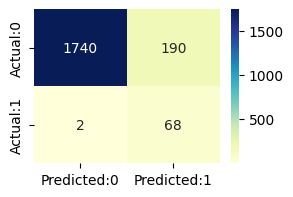

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

RandForest = RandomForestClassifier(max_depth = 4, n_estimators= 18, class_weight='balanced', random_state=42)
RandForest.fit(X_train_scaled, y_train)
y_pred = RandForest.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

With threshold=0.0
Confusion Matrix:
 [[   0 1930]
 [   0   70]]
  Correct predictions: 70  |  Type II errors (FN): 0
  Sensitivity: 1.000  Specificity: 0.000


With threshold=0.1
Confusion Matrix:
 [[ 602 1328]
 [   1   69]]
  Correct predictions: 671  |  Type II errors (FN): 1
  Sensitivity: 0.986  Specificity: 0.312


With threshold=0.2
Confusion Matrix:
 [[1486  444]
 [   1   69]]
  Correct predictions: 1555  |  Type II errors (FN): 1
  Sensitivity: 0.986  Specificity: 0.770


With threshold=0.3
Confusion Matrix:
 [[1616  314]
 [   1   69]]
  Correct predictions: 1685  |  Type II errors (FN): 1
  Sensitivity: 0.986  Specificity: 0.837


With threshold=0.4
Confusion Matrix:
 [[1688  242]
 [   1   69]]
  Correct predictions: 1757  |  Type II errors (FN): 1
  Sensitivity: 0.986  Specificity: 0.875


With threshold=0.5
Confusion Matrix:
 [[1740  190]
 [   2   68]]
  Correct predictions: 1808  |  Type II errors (FN): 2
  Sensitivity: 0.971  Specificity: 0.902


With threshold=0.6
Confus

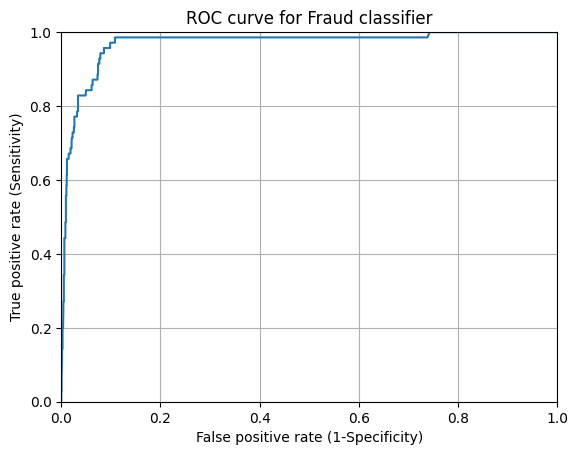

In [32]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix

y_pred_prob_yes = RandForest.predict_proba(X_test_scaled)

for i in range(0, 11):
    thresh = i / 10
    y_pred2 = binarize(y_pred_prob_yes, threshold=thresh)[:, 1].astype(int)
    cm2 = confusion_matrix(y_test, y_pred2)
    
    tn, fp, fn, tp = cm2.ravel()
    accuracy = tn + tp
    sensitivity = tp / float(tp + fn)      # recall of positive class
    specificity = tn / float(tn + fp)      # true negative rate
    
    print(f"With threshold={thresh:.1f}")
    print("Confusion Matrix:\n", cm2)
    print(f"  Correct predictions: {accuracy}  |  Type II errors (FN): {fn}")
    print(f"  Sensitivity: {sensitivity:.3f}  Specificity: {specificity:.3f}\n\n")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9693042190969652

#### Random Forest Model Interpretation

In [34]:
importances = RandForest.feature_importances_
feat_importances = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print(feat_importances)

               feature  importance
2     Rotational Speed    0.350624
3               Torque    0.316921
4            Tool Wear    0.228349
0      Air Temperature    0.086552
1  Process Temperature    0.017553


In [35]:
# Odds : Perbandingan probabilitas suatu kejadian terjadi dengan probabilitas tidak terjadi
# Log‑Odds : logaritma natural (ln) dari odds.
import shap

explainer = shap.Explainer(RandForest)
shap_values = explainer(X_test_scaled)
print(shap_values.shape)
pos_idx = list(RandForest.classes_).index(1)
# Ambil SHAP untuk kelas positif
shap_pos = shap_values[:, :, pos_idx]   # shape -> (n_samples, n_features)

(2000, 5, 2)


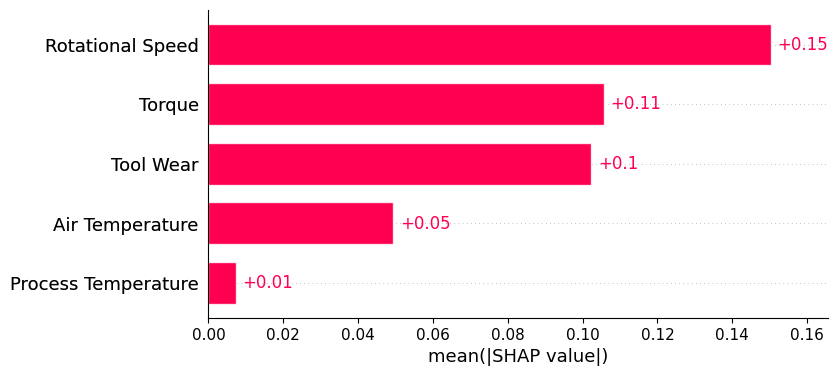

In [36]:
# Mean SHAP Bar Plot
# Plot rata-rata aboslute SHAP per fitur
shap.initjs()
shap.plots.bar(shap_pos, max_display=10)

1. Fitur diurutkan berdasarkan pengaruh rata-rata absolutnya terhadap output model, dari yang paling penting (teratas) ke yang paling tidak penting (terbawah). Di sini, Rotational Speed adalah fitur paling berpengaruh dalam prediksi model, diikuti Torque, lalu Tool Wear, dan seterusnya.
2. Rotational Speed memiliki nilai sekitar 0.17, artinya secara rata-rata, fitur ini menyumbang ±0.17 unit ke prediksi model (dalam skala log-odds jika model klasifikasi). Torque menyumbang ±0.10 unit secara rata-rata, dst

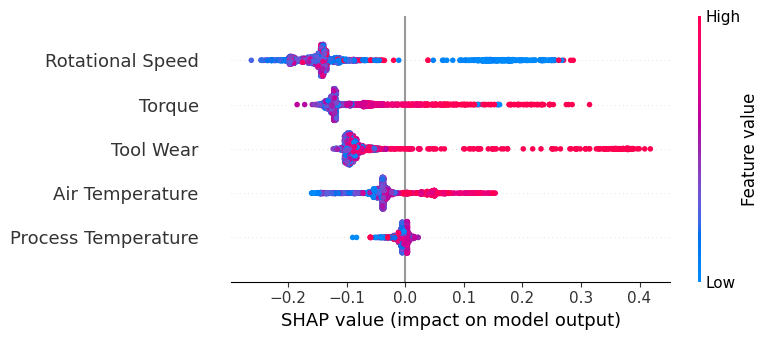

In [37]:
# Summary Plot
shap.initjs()
shap.summary_plot(
    shap_pos.values,      # array shape (n_samples, n_features)
    X_test_scaled,            # DataFrame -> dipakai untuk feature names & warna
    plot_type="dot",      # dot = beeswarm
    max_display=10        # tampilkan 10 fitur teratas
)

1. Rotational Speed :
- Efek Rotational Speed terhadap failure bersifat kontekstual.
- SHAP menunjukkan nilai Rotational Speed rendah bisa menaikkan atau menurunkan risiko failure, tergantung kombinasi dengan fitur lain.
- Untuk investigasi lebih dalam → buat dependence plot shap.plots.scatter() untuk Torque vs SHAP value, sambil warnai dengan fitur lain seperti "Torque"
2. Torque :
- Efek Torque terhadap failure bersifat kontekstual.
- SHAP menunjukkan nilai torque tinggi bisa menaikkan atau menurunkan risiko failure, tergantung kombinasi dengan fitur lain.
- Untuk investigasi lebih dalam → buat dependence plot shap.plots.scatter() untuk Torque vs SHAP value, sambil warnai dengan fitur lain seperti "Rotational Speed"
3. Makin tinggi Tool Wear makin besar failure
4. Makin tinggi Air Temperature makin besar failure
5. Makin tinggi Process Temperature makin besar failure

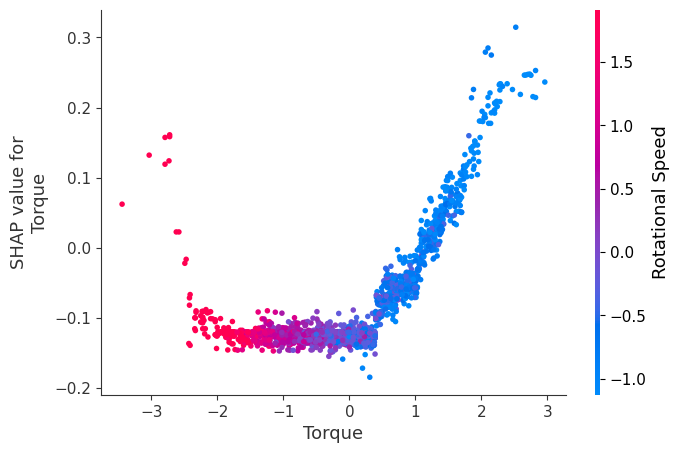

In [38]:
# Contoh: dependence plot untuk fitur 'torque' dan 'rotational speed'
shap.dependence_plot("Torque", shap_pos.values, X_test_scaled, interaction_index="Rotational Speed")

- Torque hanya berdampak besar pada failure ketika Rotational Speed rendah.
- Ketika Rotational Speed tinggi, efek Torque terhadap failure lebih kecil (SHAP value tetap rendah/negatif).

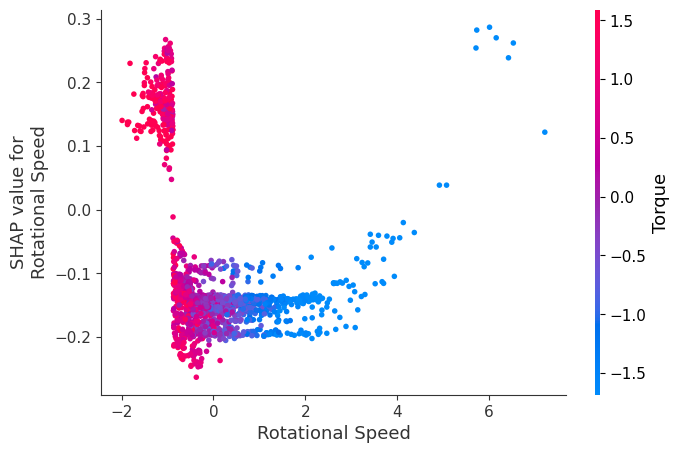

In [39]:
# Contoh: dependence plot untuk fitur 'torque' dan 'rotational speed'
shap.dependence_plot("Rotational Speed", shap_pos.values, X_test_scaled, interaction_index="Torque")

1. Rotational Speed hanya berdampak besar pada failure ketika Torque tinggi
2. Ketika Torque rendah, efek Rotational Speed terhadap failure lebih kecil (SHAP value tetap rendah/negatif).

#### Random Forest dipilih sebagai model

In [40]:
# Save Model
import joblib
joblib.dump(RandForest, 'Random_Forest_Failure_Detection.pkl')
joblib.dump(model1_scaler, 'StandardScaler_v1.pkl')

['StandardScaler_v1.pkl']

### 2. Modelling Machine Failure Type Classification

In [41]:
df_failure = df_preprocessed.loc[df_preprocessed['Machine failure'] > 0]
print(df_failure.shape)
df_failure.head()

(348, 14)


,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split
X = df_failure.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df_failure[['TWF', 'HDF', 'PWF', 'OSF','RNF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# NUMERIC FEATURE SCALING
import pandas as pd
from sklearn.preprocessing import StandardScaler
col = ['Air Temperature', 'Process Temperature', 'Rotational Speed', 'Torque', 'Tool Wear']
model2_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    model2_scaler.fit_transform(X_train[num_col]),
    columns=num_col,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    model2_scaler.transform(X_test[num_col]),
    columns=num_col,
    index=X_test.index
)
X_test_scaled.shape

(70, 5)

#### Logictic Regression

In [44]:
from sklearn.multioutput import MultiOutputClassifier

logreg = LogisticRegression(solver='lbfgs', class_weight='balanced', random_state = 42)
multi_model = MultiOutputClassifier(logreg)
multi_model.fit(X_train_scaled, y_train)

,estimator,LogisticRegre...ndom_state=42)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'


In [45]:
from sklearn.metrics import classification_report
print('TRAIN DATA')
y_pred = multi_model.predict(X_train_scaled)
print(classification_report(y_train, y_pred, target_names=y.columns))

print('TEST DATA')
y_pred = multi_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=y.columns))

TRAIN DATA
              precision    recall  f1-score   support

         TWF       0.56      0.97      0.71        38
         HDF       0.88      1.00      0.93        91
         PWF       0.89      0.96      0.92        74
         OSF       0.82      1.00      0.90        77
         RNF       0.14      0.71      0.24        17

   micro avg       0.67      0.97      0.80       297
   macro avg       0.66      0.93      0.74       297
weighted avg       0.78      0.97      0.85       297
 samples avg       0.76      0.97      0.82       297

TEST DATA
              precision    recall  f1-score   support

         TWF       0.44      0.88      0.58         8
         HDF       0.83      1.00      0.91        24
         PWF       0.95      0.95      0.95        21
         OSF       0.88      1.00      0.93        21
         RNF       0.14      1.00      0.25         2

   micro avg       0.71      0.97      0.82        76
   macro avg       0.65      0.97      0.72        76
we

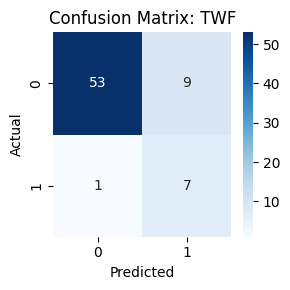

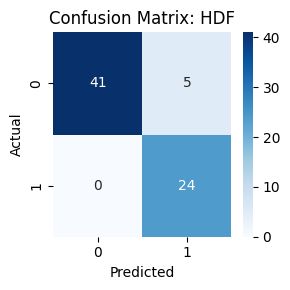

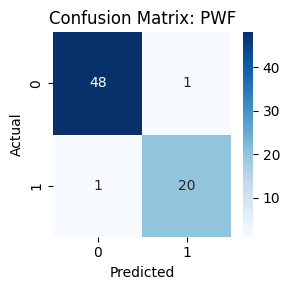

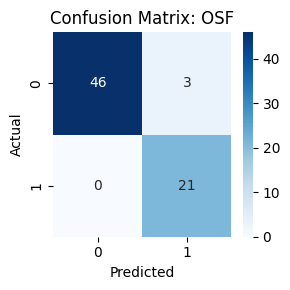

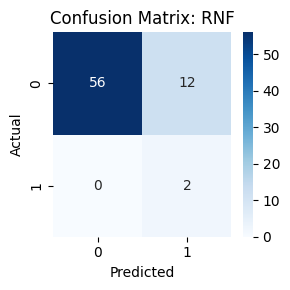

In [46]:
# Confusion matrix per label (optional)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

for i, label in enumerate(y.columns):
    plt.figure(figsize=(3,3))
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap="Blues")
    plt.title(f'Confusion Matrix: {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

##### Multicolinearity Test

In [47]:
#VIF CHECK
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Rotational Speed,5.13
3,Torque,4.93
0,Air Temperature,4.00
1,Process Temperature,3.60
4,Tool Wear,1.21


In [48]:
X_train_new = X_train_scaled.drop(['Rotational Speed'], axis = 1)

In [49]:
#VIF CHECK
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Air Temperature,3.68
1,Process Temperature,3.54
3,Tool Wear,1.10
2,Torque,1.00


In [50]:
from sklearn.multioutput import MultiOutputClassifier

logreg = LogisticRegression(solver='lbfgs', class_weight='balanced', random_state = 42)
new_multi_model = MultiOutputClassifier(logreg)
new_multi_model.fit(X_train_new, y_train)

,estimator,LogisticRegre...ndom_state=42)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'


In [51]:
from sklearn.metrics import classification_report
print('TRAIN DATA')
y_pred = new_multi_model.predict(X_train_new)
print(classification_report(y_train, y_pred, target_names=y.columns))

X_test_new = X_test_scaled.drop(['Rotational Speed'], axis = 1)
print('TEST DATA')
y_pred = new_multi_model.predict(X_test_new)
print(classification_report(y_test, y_pred, target_names=y.columns))

TRAIN DATA
              precision    recall  f1-score   support

         TWF       0.51      0.97      0.67        38
         HDF       0.82      0.99      0.90        91
         PWF       0.48      0.65      0.55        74
         OSF       0.83      1.00      0.91        77
         RNF       0.15      0.71      0.25        17

   micro avg       0.58      0.89      0.70       297
   macro avg       0.56      0.86      0.65       297
weighted avg       0.66      0.89      0.75       297
 samples avg       0.66      0.90      0.73       297

TEST DATA
              precision    recall  f1-score   support

         TWF       0.37      0.88      0.52         8
         HDF       0.85      0.92      0.88        24
         PWF       0.62      0.76      0.68        21
         OSF       0.88      1.00      0.93        21
         RNF       0.00      0.00      0.00         2

   micro avg       0.61      0.87      0.72        76
   macro avg       0.54      0.71      0.60        76
we

#### Tree Based Model

In [52]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

models = {
    'DecisionTree': {
        'estimator': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'param_grid': {
            'estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'estimator__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
        }
    },
    'RandomForest': {
        'estimator': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'param_grid': {
            'estimator__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20],
            'estimator__max_depth': [2, 3, 4, 5, 6, 7, 8],
        }
    },
    'XGBoost': {
        'estimator': XGBClassifier(
            random_state=42,
            objective='binary:logistic',  # for each label
            use_label_encoder=False,
            eval_metric='logloss'
        ),
        'param_grid': {
            'estimator__n_estimators': [5, 10, 15, 20],
            'estimator__max_depth': [2, 4, 6, 8],
            'estimator__learning_rate': [0.1, 0.2],
            'estimator__subsample': [0.8, 1.0],
            'estimator__reg_alpha': [0, 1],
            'estimator__reg_lambda': [1, 10],
            'estimator__min_child_weight': [1, 5]
        }
    }
}

best_models = {}
best_scores = {}

for name, info in models.items():
    print(f"\n🔍 Tuning: {name}")
    
    multi_clf = MultiOutputClassifier(info['estimator'], n_jobs=-1)
    gs = GridSearchCV(
        estimator  = multi_clf,
        param_grid = info['param_grid'],
        scoring    = 'f1_macro',
        cv         = 3,
        n_jobs     = -1,
        verbose    = 2
    )
    gs.fit(X_train_scaled, y_train)
    best_models[name] = gs.best_estimator_
    best_scores[name] = gs.best_score_
    print(f"{name}: best_params={gs.best_params_}, CV-F1 Macro Avg={gs.best_score_:.4f}")

# 🏆 Pilih model terbaik
best_name = max(best_scores, key=best_scores.get)
best_clf  = best_models[best_name]
print(f"\n✅ Best Model: {best_name}")


🔍 Tuning: DecisionTree
Fitting 3 folds for each of 81 candidates, totalling 243 fits
DecisionTree: best_params={'estimator__max_depth': 6, 'estimator__min_samples_split': 6}, CV-F1 Macro Avg=0.8113

🔍 Tuning: RandomForest
Fitting 3 folds for each of 98 candidates, totalling 294 fits
RandomForest: best_params={'estimator__max_depth': 7, 'estimator__n_estimators': 16}, CV-F1 Macro Avg=0.8310

🔍 Tuning: XGBoost
Fitting 3 folds for each of 512 candidates, totalling 1536 fits
XGBoost: best_params={'estimator__learning_rate': 0.1, 'estimator__max_depth': 6, 'estimator__min_child_weight': 1, 'estimator__n_estimators': 20, 'estimator__reg_alpha': 0, 'estimator__reg_lambda': 1, 'estimator__subsample': 1.0}, CV-F1 Macro Avg=0.8429

✅ Best Model: XGBoost


In [53]:
# 🔎 Evaluasi di train & test set
print("TRAIN DATA")
y_pred = best_clf.predict(X_train_scaled)
print(classification_report(y_train, y_pred, target_names=y.columns))

print("TEST DATA")
y_pred = best_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=y.columns))

TRAIN DATA
              precision    recall  f1-score   support

         TWF       1.00      0.89      0.94        38
         HDF       1.00      0.97      0.98        91
         PWF       1.00      1.00      1.00        74
         OSF       1.00      0.99      0.99        77
         RNF       1.00      0.65      0.79        17

   micro avg       1.00      0.95      0.98       297
   macro avg       1.00      0.90      0.94       297
weighted avg       1.00      0.95      0.97       297
 samples avg       0.96      0.96      0.96       297

TEST DATA
              precision    recall  f1-score   support

         TWF       0.86      0.75      0.80         8
         HDF       0.95      0.88      0.91        24
         PWF       0.91      1.00      0.95        21
         OSF       0.91      1.00      0.95        21
         RNF       0.00      0.00      0.00         2

   micro avg       0.92      0.91      0.91        76
   macro avg       0.73      0.72      0.72        76
we

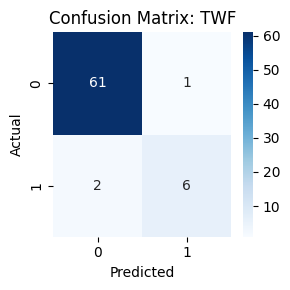

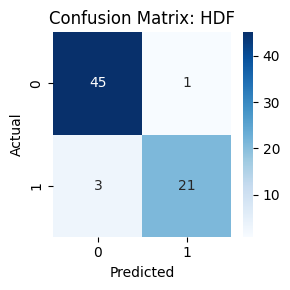

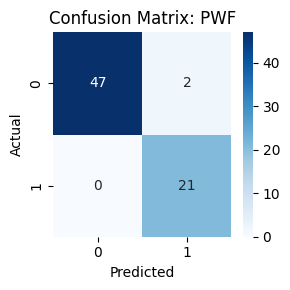

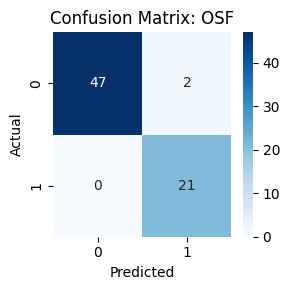

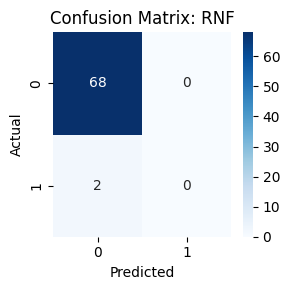

In [54]:
# Confusion matrix per label
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

for i, label in enumerate(y.columns):
    plt.figure(figsize=(3,3))
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap="Blues")
    plt.title(f'Confusion Matrix: {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

#### SVM

In [55]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

# Inisialisasi SVM dengan class_weight balanced untuk imbalanced class
svm = SVC(kernel='rbf', class_weight='balanced', probability = True, random_state=42, C = 1, gamma = 0.2)
# Bungkus dengan MultiOutputClassifier untuk multilabel setup
multilabel_svm = MultiOutputClassifier(svm)
# Latih model pada data
multilabel_svm.fit(X_train_scaled, y_train)

,estimator,"SVC(C=1, clas...ndom_state=42)"
,n_jobs,None
,C,1
,kernel,'rbf'
,degree,3
,gamma,0.2
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200


In [56]:
# 🔎 Evaluasi di train & test set
print("TRAIN DATA")
y_pred = multilabel_svm.predict(X_train_scaled)
print(classification_report(y_train, y_pred, target_names=y.columns))
print("TEST DATA")
y_pred = multilabel_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=y.columns))

TRAIN DATA
              precision    recall  f1-score   support

         TWF       0.64      0.97      0.77        38
         HDF       0.90      1.00      0.95        91
         PWF       0.93      0.93      0.93        74
         OSF       0.82      1.00      0.90        77
         RNF       0.42      0.88      0.57        17

   micro avg       0.80      0.97      0.88       297
   macro avg       0.74      0.96      0.82       297
weighted avg       0.83      0.97      0.89       297
 samples avg       0.87      0.98      0.90       297

TEST DATA
              precision    recall  f1-score   support

         TWF       0.54      0.88      0.67         8
         HDF       0.86      1.00      0.92        24
         PWF       0.95      0.90      0.93        21
         OSF       0.88      1.00      0.93        21
         RNF       0.33      1.00      0.50         2

   micro avg       0.80      0.96      0.87        76
   macro avg       0.71      0.96      0.79        76
we

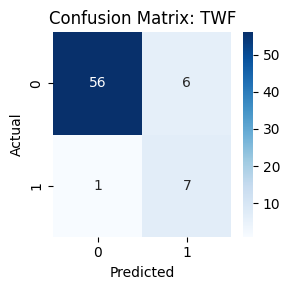

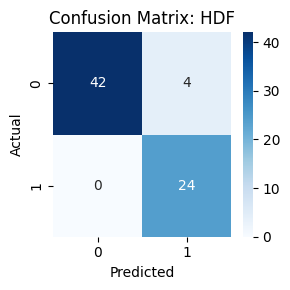

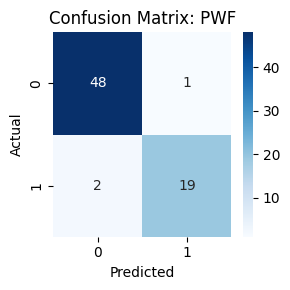

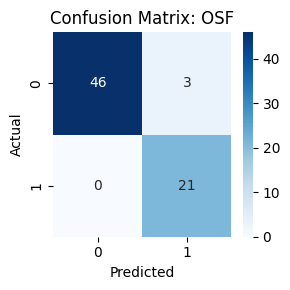

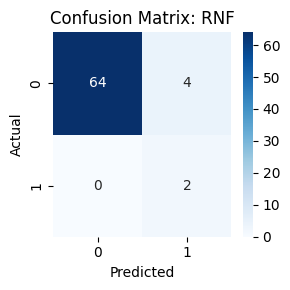

In [57]:
# Confusion matrix per label
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

for i, label in enumerate(y.columns):
    plt.figure(figsize=(3,3))
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap="Blues")
    plt.title(f'Confusion Matrix: {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

#### SVM dipilih sebagai model

In [58]:
# Save Model
import joblib
joblib.dump(multilabel_svm, 'SVM_Failure_Type_Classification.pkl')
joblib.dump(model2_scaler, 'StandardScaler_v2.pkl')

['StandardScaler_v2.pkl']

#### SVM Model Interpretation

Using 278 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:08<00:00,  8.64it/s]
Using 278 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.39it/s]
Using 278 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:08<00:00,  8.53it/s]
Using 278 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the b

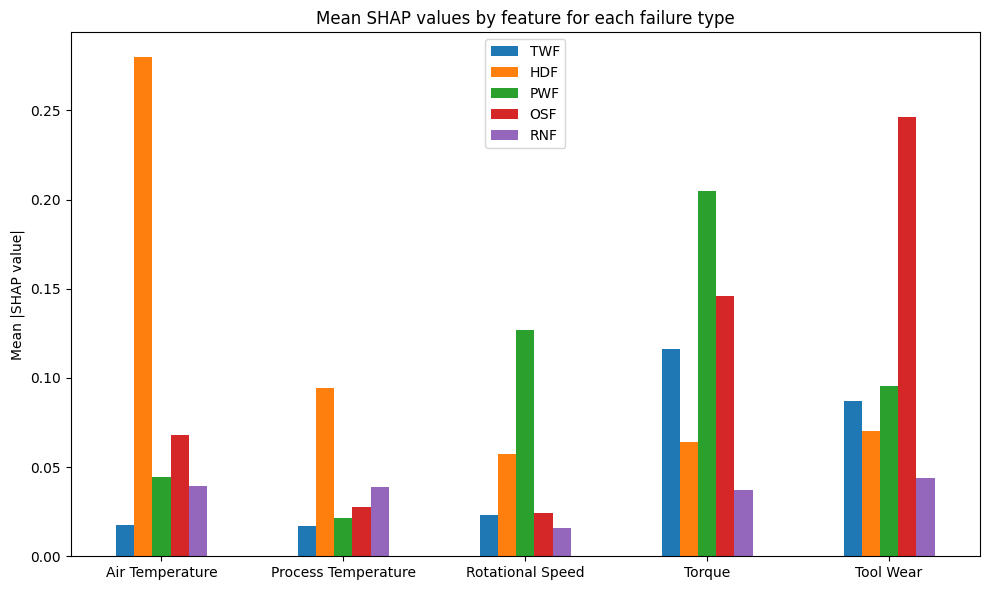

In [59]:
import shap
import warnings
warnings.filterwarnings("ignore")

# pick background & test
background = X_train_scaled.iloc[:278]
test_data  = X_test_scaled.iloc[:70]

# compute per‐label SHAP values (class “1”)
mean_shap = {}
shap_vals_dict = {}
for i, label in enumerate(y_train.columns):
    m = multilabel_svm.estimators_[i]
    # wrap predict_proba → only class-1 prob as 1D array
    f1 = lambda X: m.predict_proba(X)[:, 1]
    # build explainer on the scalar function f1
    explainer = shap.KernelExplainer(f1, background)
    # shap_vals: shape = (n_samples, n_features)
    shap_vals = explainer.shap_values(test_data)
        # simpan untuk plot
    shap_vals_dict[label] = shap_vals
    # take mean absolute value per feature
    mean_shap[label] = np.abs(shap_vals).mean(axis=0)

# mean_shap[label].shape == (5,) for each label
df_shap = pd.DataFrame(mean_shap, index=num_col)

ax = df_shap.plot(kind='bar', figsize=(10,6), rot=0)
ax.set_ylabel('Mean |SHAP value|')
ax.set_title('Mean SHAP values by feature for each failure type')
plt.tight_layout()
plt.show()

CLASS: TWF


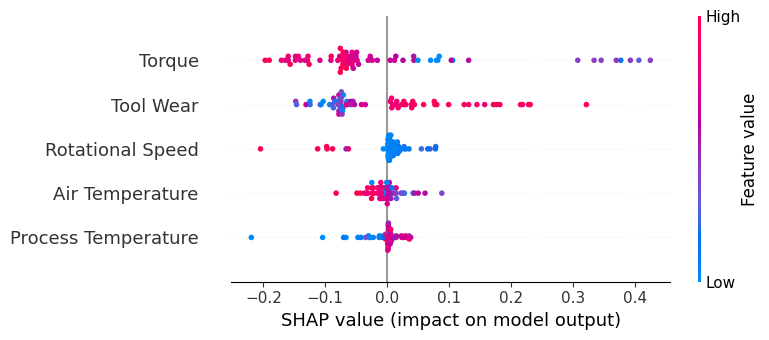

CLASS: HDF


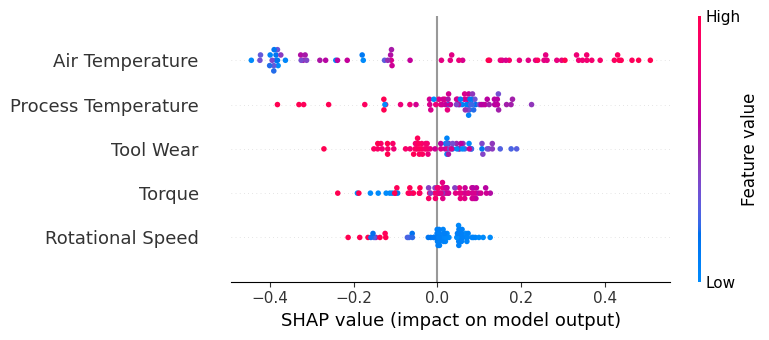

CLASS: PWF


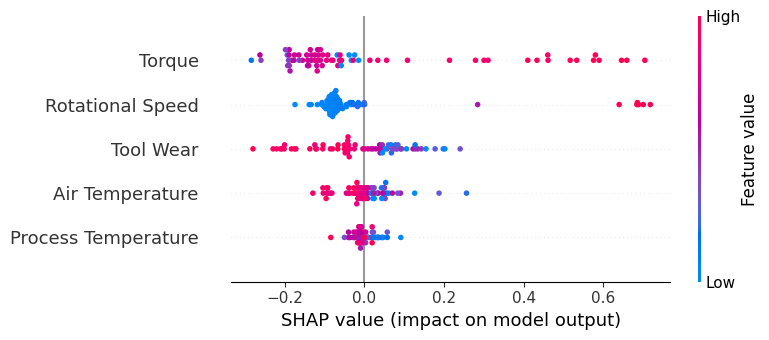

CLASS: OSF


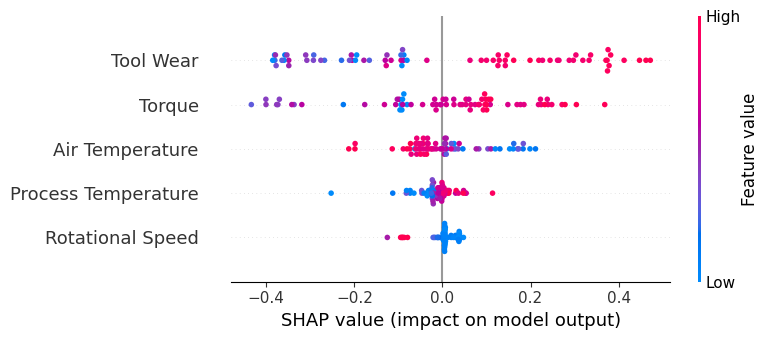

CLASS: RNF


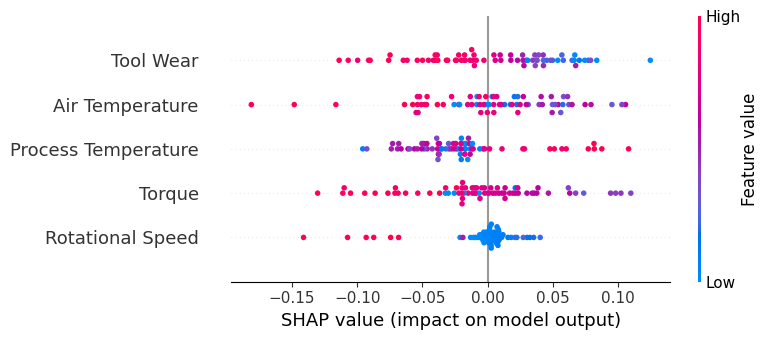

In [60]:
#Beeswarm Plot per Class
for label in y_train.columns:
    print(f"CLASS: {label}")
    shap.summary_plot(
        shap_values=shap_vals_dict[label],
        features=test_data,
        feature_names=num_col,
        plot_type='dot',
        show=True
    )

### 6. Answering Questions

#### Variabel Apa yang paling mempengaruhi Machine menjadi Fail?

Dari analisa SHAP Random Forest :
1. Rot Speed
2. Torque
3. Tool Wear
4. Air Temperature
5. Process Temperature

#### Tipe kualitas produk (L, M, H) apa yang paling sering gagal mesin?

In [85]:
df_renamed.head()

,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


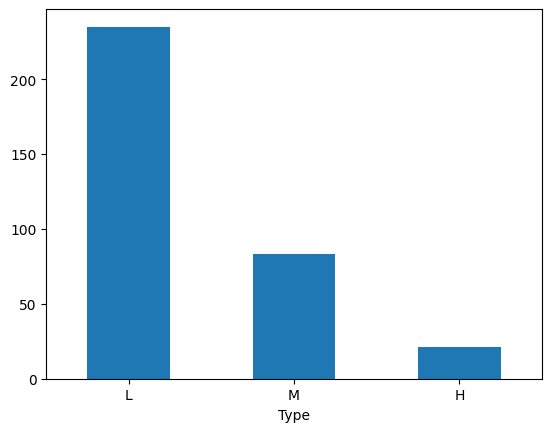

In [86]:
df_type_vs_failure = df_renamed.groupby('Type')['Machine failure'].sum().sort_values(ascending=False)
df_type_vs_failure.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()